# Practice community detections

Communities package https://github.com/shobrook/communities

Sklearn package https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html

Manifold visualization
https://scikit-learn.org/stable/modules/manifold.html



Resources: sklearn, scikit-network, nx community, communities, etc.

Focus: (1) computational time, (2) weighting or not, (3) whether I can specify the number of communities, and (4) theoretical complexity from the papers.

- Question: How to obtain a balanced communities?
- Question: How to get the probabilistic membership for communities?

Goal: Identify a good algorithm for the segregation paper (large sample size, weights are needed, 2 communities)

### Networkx Example

In [2]:
from networkx.algorithms import community
import networkx as nx

In [2]:
G = nx.barbell_graph(5, 1)

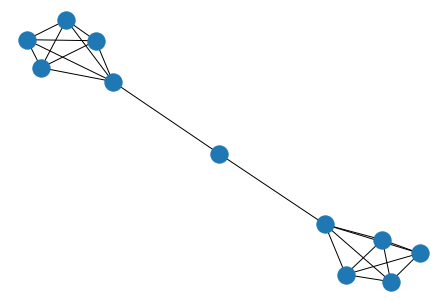

In [3]:
nx.draw(G)

Example from networkx 
https://networkx.org/documentation/stable/reference/algorithms/community.html#


In [7]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
next_next_level_communities = next(communities_generator)
print(sorted(map(sorted, next_level_communities)))
print(list(map(sorted, top_level_communities)))

[[0, 1, 2, 3, 4], [5], [6, 7, 8, 9, 10]]
[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9, 10]]


In [9]:
top_level_communities

({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9, 10})

In [10]:
next_level_communities

({0, 1, 2, 3, 4}, {6, 7, 8, 9, 10}, {5})

In [8]:
next_next_level_communities

({0}, {1, 2, 3, 4}, {6, 7, 8, 9, 10}, {5})

### Comparing community detection algorithms

- Girvan Newman (hierarchial communities)
- Greedy modularity communities
- Naive greedy modularity communities 
- Louvain method from communities module 
- Hierarchical clustering from communities module 
- Jure Leskovec - The supervised learning approach

In [1]:
import numpy as np
import time
from communities.algorithms import hierarchical_clustering

array([[0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0]])

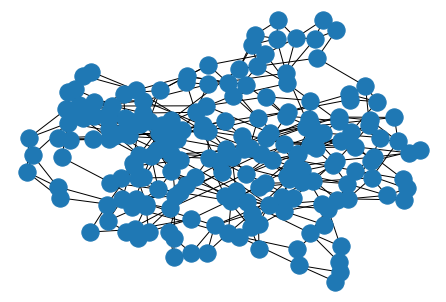

In [77]:
# generate a small-world network for the experiment.
G = nx.watts_strogatz_graph(200, 5, 0.2)
nx.draw(G)
A = np.array(nx.adjacency_matrix(G).todense())
A

##### 1. Kernighan Lin bisection (1970) - from nx community module.
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kernighan_lin.kernighan_lin_bisection.html#networkx.algorithms.community.kernighan_lin.kernighan_lin_bisection

Weight is allowed. Two partitions only. 
To-Do, read the paper: Kernighan, B. W.; Lin, Shen (1970). “An efficient heuristic procedure for partitioning graphs.” Bell Systems Technical Journal 49: 291–307. Oxford University Press 2011.


In [7]:
start_time = time.time()
community_kernighan_lin = community.kernighan_lin_bisection(G)
end_time = time.time()
print("Kernighan Lin algorithm takes: ", np.round(end_time - start_time, decimals = 3), 'seconds')
community_kernighan_lin

Kernighan Lin algorithm takes:  0.017 seconds


({0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  16,
  17,
  18,
  20,
  21,
  22,
  24,
  25,
  26,
  27,
  39,
  41,
  45,
  47,
  49,
  52,
  54,
  56,
  57,
  58,
  59,
  60,
  62,
  63,
  67,
  69,
  75,
  77,
  79,
  81,
  83,
  84,
  87,
  88,
  89,
  90,
  91,
  94,
  96,
  97,
  98,
  101,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  117,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  131,
  132,
  134,
  141,
  143,
  144,
  145,
  146,
  148,
  152,
  153,
  154,
  155,
  156,
  167,
  168,
  169,
  178,
  179,
  180,
  181,
  182,
  184,
  185,
  187,
  194,
  195,
  196,
  197,
  198,
  199},
 {12,
  13,
  14,
  15,
  19,
  23,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  40,
  42,
  43,
  44,
  46,
  48,
  50,
  51,
  53,
  55,
  61,
  64,
  65,
  66,
  68,
  70,
  71,
  72,
  73,
  74,
  76,
  78,
  80,
  82,
  85,
  86,
  92,
  93,
  95,
  99,
  100,
  102,
  103,
  104,
  105,
  106,
  114,
  115,
  116,
  118,
  126,
  1

##### 2. Greedy modularity communities (2004) - nx community module.

Weight is allowed. I cannot choose the number of communities. Read Clauset, A., Newman, M. E., & Moore, C. “Finding community structure in very large networks.” Physical Review E 70(6), 2004.


In [12]:
start_time = time.time()
communities = community.greedy_modularity_communities(G)
end_time = time.time()

In [14]:
print("Greedy modularity takes", np.round(end_time - start_time, decimals = 3), 'seconds')
for c_ in communities:
    print(c_)

Greedy modularity takes 0.035 seconds
frozenset({167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185})
frozenset({96, 97, 98, 99, 100, 101, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95})
frozenset({106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121})
frozenset({129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144})
frozenset({32, 33, 34, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31})
frozenset({64, 65, 66, 67, 68, 69, 70, 63, 57, 58, 59, 60, 61, 62, 127})
frozenset({0, 193, 194, 195, 196, 1, 2, 3, 4, 197, 5, 198, 6, 199, 157})
frozenset({7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19})
frozenset({44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56})
frozenset({71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84})
frozenset({128, 102, 103, 104, 105, 75, 122, 123, 124, 125, 126})
frozenset({145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155})
frozenset({160, 161, 162, 163, 164, 165, 166, 156

##### 3. Label propagation LPA (2007) - nx community module.

Weight is allowed. No community number. Read: Raghavan, Usha Nandini, Réka Albert, and Soundar Kumara. “Near linear time algorithm to detect community structures in large-scale networks.” Physical Review E 76.3 (2007): 036106.

SW: It is REALLY fast!


In [15]:
start_time = time.time()
communities = community.asyn_lpa_communities(G)
end_time = time.time()

In [21]:
print("Label propagation LPA takes: ", np.round(end_time - start_time, decimals = 5), 'seconds')
for c in communities:
    print(c)

Label propagation LPA takes:  9e-05 seconds
{0, 1, 196, 197, 198, 199, 157}
{2, 3, 4, 5, 6}
{7, 122, 123, 124, 125}
{8, 9, 10, 11, 12}
{13, 14, 15, 16, 17, 18, 19}
{20, 21, 22, 23}
{24, 25}
{26, 27}
{32, 28, 29, 30, 31}
{33, 81, 82, 83, 84, 85, 86}
{34, 35, 36, 37, 38}
{39, 40, 41, 42, 43}
{44, 45}
{46, 47, 48, 49, 50, 51}
{96, 97, 98, 52, 53, 54, 55, 95}
{56, 57, 58, 59, 60, 61}
{64, 184, 152, 153, 62, 63}
{65, 66, 67, 68, 69, 70}
{72, 73, 74, 71}
{75, 102}
{106, 76, 77, 78, 79, 80}
{88, 89, 87}
{90, 91, 92, 93, 94}
{146, 99, 100, 101}
{104, 105, 103}
{107, 108, 109}
{112, 113, 110, 111}
{160, 161, 114, 115, 116, 158, 159}
{117, 118, 119}
{120, 121}
{128, 129, 126, 127}
{130, 131, 132}
{133, 134, 135, 136, 137, 138}
{139, 140, 141, 142, 143, 144, 145}
{147, 148, 149, 150, 151}
{154, 155, 156}
{162, 163, 164, 165, 166}
{167, 168, 169, 170, 171, 172}
{173, 174, 175, 176, 177, 178, 179}
{180, 181, 182, 183}
{185, 186, 187, 188}
{192, 189, 190, 191}
{193, 194, 195}


##### 4. asynchronous fluid community (2017) - nx community module.

No weight. I can choose the number of communities. Read: Fluid Communities: A Competitive and Highly Scalable Community Detection Algorithm. 

SW: What is the algorithm? 


In [26]:
start_time = time.time()
communities = community.asyn_fluidc(G,  k = 2)
end_time = time.time()

In [27]:
print("Asyn fluid: ", np.round(end_time - start_time, decimals = 5), 'seconds')
for c in communities:
    print(c)

Asyn fluid:  0.01654 seconds
{8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 34, 35, 36, 37, 38, 39, 40, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 77, 78, 79, 80, 81, 82, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 134, 152, 153, 154, 155, 156, 165, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196}
{0, 1, 2, 3, 4, 5, 6, 7, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 41, 42, 43, 45, 71, 72, 73, 74, 75, 76, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 197, 198, 199}


##### 5. Girvan Newman algorithm (2002) - nx community module.

SW: It is very slow.

In [31]:
communities = community.girvan_newman(G)

In [32]:
start_time = time.time()
tuple(sorted(c) for c in next(communities))
end_time = time.time()

print("First layer of GN algorithm (2 communities) takes ", end_time - start_time, "seconds") 

start_time = time.time()
tuple(sorted(c) for c in next(communities))
end_time = time.time()

print("Second layer of GN algorithm (3 communities) takes ", end_time - start_time, "seconds") 


First layer of GN algorithm (2 communities) takes  1.7615249156951904 seconds
Second layer of GN algorithm (3 communities) takes  1.3368110656738281 seconds


##### 6. hierarchical clustering from github communities module

SW: It does not work at all.

In [33]:
from communities.algorithms import hierarchical_clustering

In [38]:
A = np.array(nx.adjacency_matrix(G).todense())

start_time = time.time()
communities = hierarchical_clustering(A, n = 3)
end_time = time.time()

print("Hierarchical clustering takes: ", np.round(end_time - start_time, decimals = 5), 'seconds')
communities


Hierarchical clustering takes:  0.06161 seconds


[{186, 187}, {189, 192}, {195, 198}]

##### 7. Louvain method from github communities module

SW: Interesting. The algorithm is theoretically very fast. But the experiment is very slow...

In [39]:
from communities.algorithms import louvain_method

In [42]:
A = np.array(nx.adjacency_matrix(G).todense())

start_time = time.time()
communities, _ = louvain_method(A, n = 5)
end_time = time.time()

print("Louvain method takes: ", np.round(end_time - start_time, decimals = 5), 'seconds')
communities


Louvain method takes:  1.36019 seconds


[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  69,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199},
 {8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132},
 {33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  102,
  103,
  104,
  105,
  106,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156},
 {46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60

##### 8. Spectral clustering from github communities module

SW: I can use both weights and choose the number of communities. Also the spectral approach is very fast!

Q: What is the leading paper for this method?

In [48]:
from communities.algorithms import spectral_clustering

In [55]:
A = np.array(nx.adjacency_matrix(G).todense())

start_time = time.time()
communities = spectral_clustering(A, k = 2)
end_time = time.time()

print("Spectual clustering takes: ", np.round(end_time - start_time, decimals = 5), 'seconds')
print(len(communities[0]))
print(len(communities[1]))


Spectual clustering takes:  0.03573 seconds
146
54


##### 9. Louvain from python-louvain package

https://python-louvain.readthedocs.io/en/latest/api.html

In [56]:
import community as community_louvain

In [57]:
start_time = time.time()
partition = community_louvain.best_partition(G)
end_time = time.time()

In [59]:
# analyze
print("Louvain method takes ", end_time-start_time, ' seconds')
partition

Louvain method takes  0.03572893142700195  seconds


{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 4,
 25: 4,
 26: 4,
 27: 4,
 28: 4,
 29: 4,
 30: 4,
 31: 4,
 32: 4,
 33: 5,
 34: 5,
 35: 5,
 36: 5,
 37: 5,
 38: 5,
 39: 5,
 40: 5,
 41: 5,
 42: 5,
 43: 5,
 44: 5,
 45: 6,
 46: 6,
 47: 6,
 48: 6,
 49: 6,
 50: 6,
 51: 6,
 52: 8,
 53: 8,
 54: 8,
 55: 8,
 56: 8,
 57: 8,
 58: 8,
 59: 8,
 60: 6,
 61: 6,
 62: 6,
 63: 6,
 64: 6,
 65: 6,
 66: 6,
 67: 6,
 68: 6,
 69: 6,
 70: 6,
 71: 6,
 72: 6,
 73: 6,
 74: 6,
 75: 6,
 76: 3,
 77: 3,
 78: 3,
 79: 3,
 80: 11,
 81: 11,
 82: 11,
 83: 11,
 84: 11,
 85: 11,
 86: 11,
 87: 11,
 88: 11,
 89: 11,
 90: 11,
 91: 11,
 92: 11,
 93: 11,
 94: 12,
 95: 12,
 96: 12,
 97: 12,
 98: 12,
 99: 12,
 100: 12,
 101: 12,
 102: 12,
 103: 12,
 104: 2,
 105: 2,
 106: 2,
 107: 2,
 108: 2,
 109: 13,
 110: 2,
 111: 13,
 112: 13,
 113: 13,
 114: 13,
 115: 13,
 116: 13,
 117: 13,
 118: 13,
 119: 

##### 10. Dendrogram from python-louvain

https://python-louvain.readthedocs.io/en/latest/api.html

In [78]:
from community import generate_dendrogram, partition_at_level

In [79]:
start_time = time.time()
dendo = generate_dendrogram(G) # get a sequence of communities 
end_time = time.time()
print(end_time - start_time)

0.026495933532714844


In [80]:
start_time = time.time()
partition_at_level(dendo, 2)
end_time = time.time()
print(end_time - start_time)

0.0001289844512939453


##### 11. Spectral clustering from sklearn

SW Question: How to obtain the probabilistic labels for the communities?

In [81]:
from sklearn.cluster import SpectralClustering

In [82]:
A = nx.to_numpy_matrix(G)

In [88]:
start_time = time.time()
sc = SpectralClustering(3, affinity='precomputed', n_init=100, assign_labels = 'kmeans')
sc.fit(A)
end_time = time.time()

In [89]:
# analyze
print(end_time - start_time)
print(sc.labels_)

0.23415112495422363
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


##### 12. Hierarchical clustering from sklearn


In [90]:
from sklearn.cluster import AgglomerativeClustering

In [91]:
A = nx.to_numpy_matrix(G)

In [99]:
start_time = time.time()
model = AgglomerativeClustering(distance_threshold=0, n_clusters = None)
model = model.fit(A)
end_time = time.time()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [100]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'affinity',
 'children_',
 'compute_distances',
 'compute_full_tree',
 'connectivity',
 'distance_threshold',
 'distances_',
 'fit',
 'fit_predict',
 'get_params',
 'labels_',
 'linkage',
 'memory',
 'n_clusters',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_',
 'set_params']

In [105]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

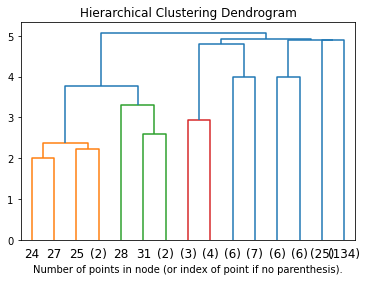

In [109]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Other examples with visualization
https://orbifold.net/default/community-detection-using-networkx/


In [15]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
import time
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

#### Example 1. karate club and greedy modularity algorithm
https://orbifold.net/default/community-detection-using-networkx/

In [27]:
G_karate = nx.karate_club_graph()
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
print(f"The karate club has {len(communities)} communities.")
print(communities)


The karate club has 3 communities.
[frozenset({32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 4, 5, 6, 10, 11, 16, 19})]


In [17]:
# SW practice. Compare the computation efficiency of multiple community detection algorithms
G_karate = nx.karate_club_graph()
starting_time = time.time()
print(starting_time)

# 
community_greedy_modularity = nxcom.greedy_modularity_communities(G_karate)
print("")

# 
communities_generator = nxcom.girvan_newman(G_karate)




1627937120.6464372



In [35]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)
                        

In [42]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

print(G_karate.nodes.data())

# node color
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
print(node_color)

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]


[(0, {'club': 'Mr. Hi', 'community': 3}), (1, {'club': 'Mr. Hi', 'community': 2}), (2, {'club': 'Mr. Hi', 'community': 2}), (3, {'club': 'Mr. Hi', 'community': 2}), (4, {'club': 'Mr. Hi', 'community': 3}), (5, {'club': 'Mr. Hi', 'community': 3}), (6, {'club': 'Mr. Hi', 'community': 3}), (7, {'club': 'Mr. Hi', 'community': 2}), (8, {'club': 'Mr. Hi', 'community': 1}), (9, {'club': 'Officer', 'community': 2}), (10, {'club': 'Mr. Hi', 'community': 3}), (11, {'club': 'Mr. Hi', 'community': 3}), (12, {'club': 'Mr. Hi', 'community': 2}), (13, {'club': 'Mr. Hi', 'community': 2}), (14, {'club': 'Officer', 'community': 1}), (15, {'club': 'Officer', 'community': 1}), (16, {'club': 'Mr. Hi', 'community': 3}), (17, {'club': 'Mr. Hi', 'community': 2}), (18, {'club': 'Officer', 'community': 1}), (19, {'club': 'Mr. Hi', 'community': 3}), (20, {'club': 'Officer', 'community': 1}), (21, {'club': 'Mr. Hi', 'community': 2}), (22, {'club': 'Officer', 'community': 1}), (23, {'club': 'Officer', 'community':

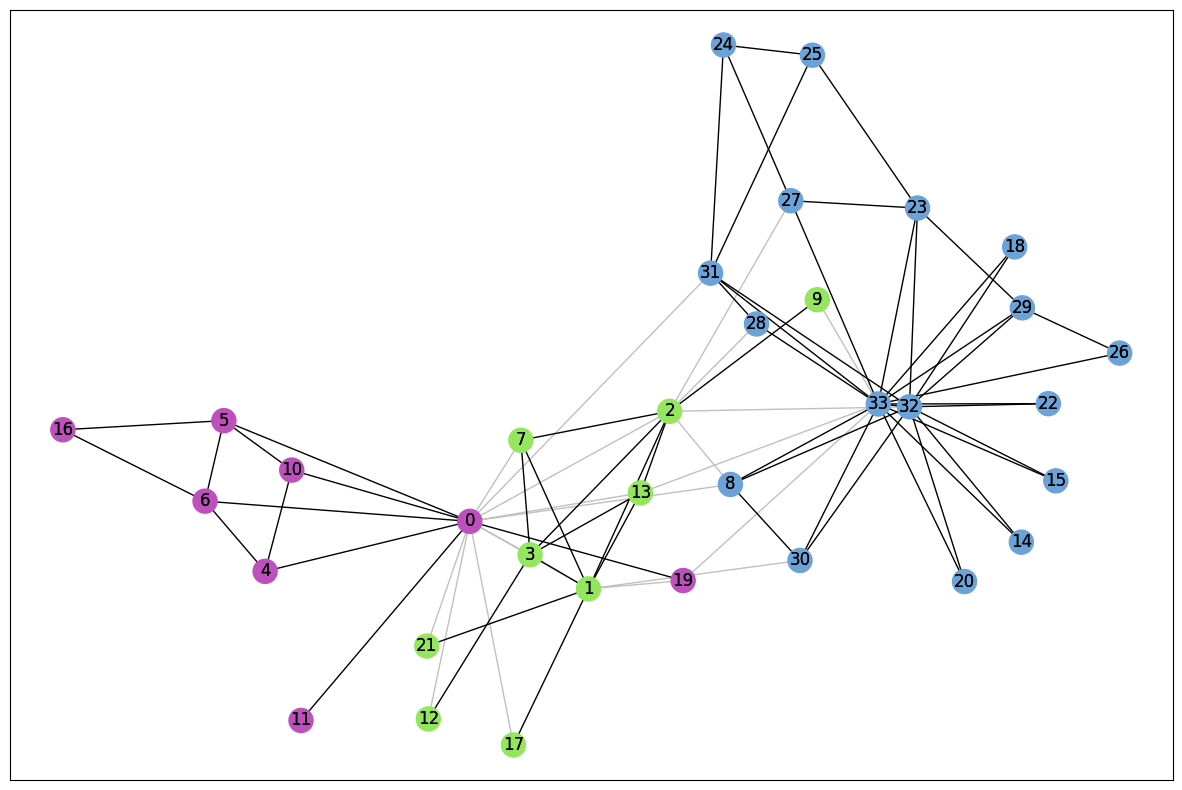

In [49]:
# visualization
karate_pos = nx.spring_layout(G_karate)

plt.rcParams.update({'figure.figsize': (15, 10)})

# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=10,
    edgelist=external,
    edge_color="silver")

# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)


#### Example 2. facebook (similar to above)
https://orbifold.net/default/community-detection-using-networkx/

In [51]:
data_path = './data/facebook/facebook_combined.txt'
G_social = nx.read_edgelist(data_path)

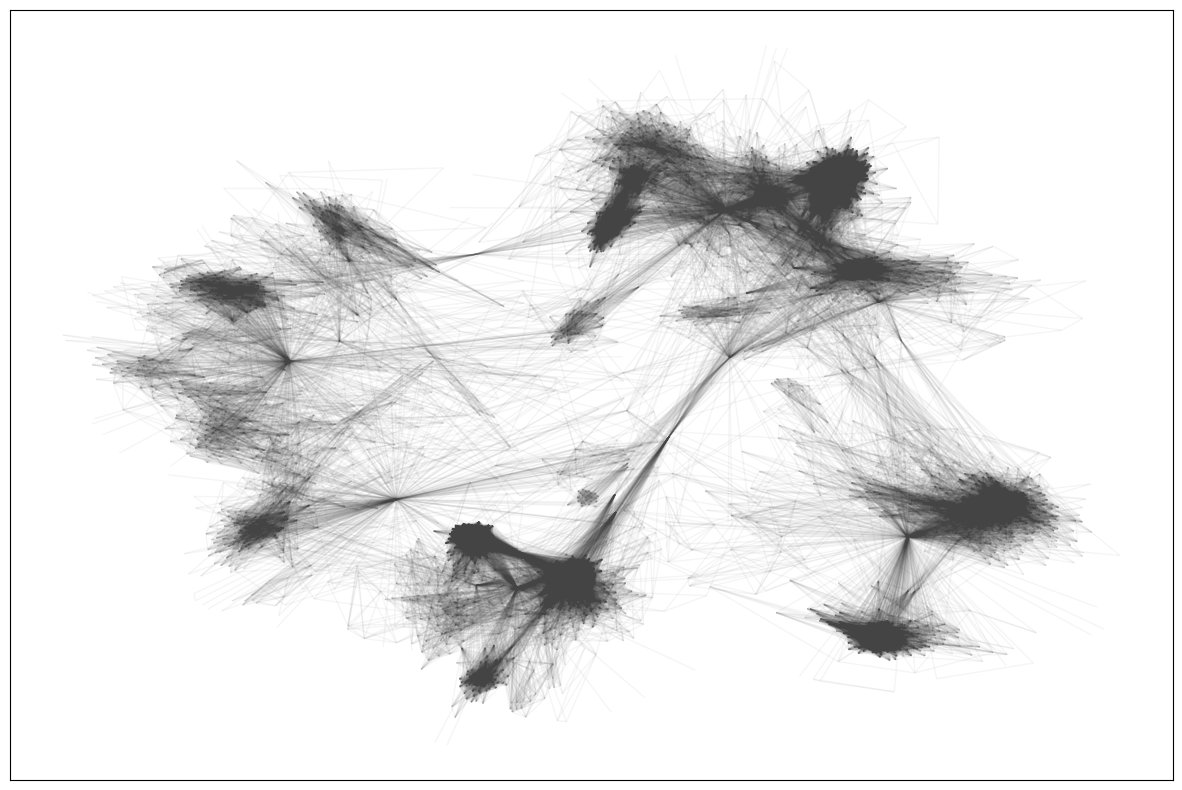

In [52]:
# visual
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edge_color="#444444", 
    alpha=0.05, 
    with_labels=False)

In [53]:
# communities
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)

13

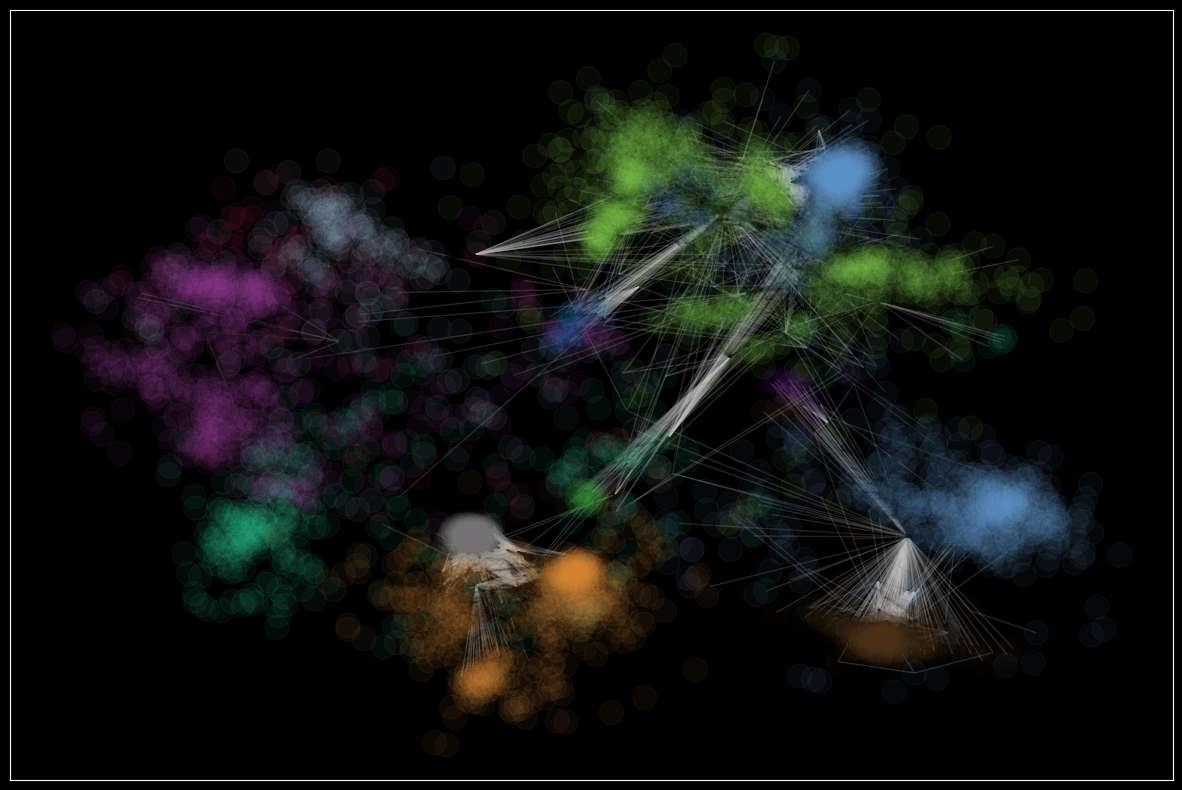

In [54]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]

# external edges
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edgelist=external, 
    edge_color="silver",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)

# internal edges
nx.draw_networkx(
    G_social, 
    pos=pos, 
    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)


#### Examples 3, 4, 5 - Other community detection algorithms from nx

Including Girvan-Newman, K-core, etc. Just check the website.
https://orbifold.net/default/community-detection-using-networkx/
